# Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

In [63]:
import pandas as pd
import numpy as np
HRTU_2=pd.read_csv("/content/drive/MyDrive/Datasets/HTRU_2.csv",header=None)
HRTU_2

0          1         2  ...          6           7  8
0      140.562500  55.683782 -0.234571  ...   7.975532   74.242225  0
1      102.507812  58.882430  0.465318  ...  10.576487  127.393580  0
2      103.015625  39.341649  0.323328  ...   7.735822   63.171909  0
3      136.750000  57.178449 -0.068415  ...   6.896499   53.593661  0
4       88.726562  40.672225  0.600866  ...  14.269573  252.567306  0
...           ...        ...       ...  ...        ...         ... ..
17893  136.429688  59.847421 -0.187846  ...  15.450260  285.931022  0
17894  122.554688  49.485605  0.127978  ...   2.945244    8.297092  0
17895  119.335938  59.935939  0.159363  ...   2.499517    4.595173  0
17896  114.507812  53.902400  0.201161  ...  10.007967  134.238910  0
17897   57.062500  85.797340  1.406391  ...  -1.597527    1.429475  0

[17898 rows x 9 columns]

In [64]:
df=HRTU_2.copy()
df=df.drop(columns=8)
from sklearn import preprocessing
rdf=pd.DataFrame(preprocessing.scale(df))
rdf

0         1         2  ...         5         6         7
0      1.149317  1.334832 -0.669570  ... -0.370625 -0.072798 -0.287438
1     -0.334168  1.802265 -0.011785  ... -0.588924  0.504427  0.211581
2     -0.314372 -1.053322 -0.145233  ... -0.235328 -0.125996 -0.391373
3      1.000694  1.553254 -0.513409  ... -0.275666 -0.312265 -0.481300
4     -0.871402 -0.858879  0.115609  ... -0.763111  1.324026  1.386794
...         ...       ...       ...  ...       ...       ...       ...
17893  0.988208  1.943284 -0.625655  ... -0.727295  1.586054  1.700034
17894  0.447319  0.429062 -0.328831  ...  0.939926 -1.189159 -0.906574
17895  0.321842  1.956220 -0.299334  ...  1.671568 -1.288079 -0.941330
17896  0.133628  1.074510 -0.260050  ... -0.664857  0.378257  0.275850
17897 -2.105762  5.735470  0.872674  ...  1.971546 -2.197327 -0.971052

[17898 rows x 8 columns]

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
ddf=pca.fit_transform(rdf)
ddf

array([[-1.27884879, -1.27313333],
       [-1.02055347, -0.20116189],
       [ 0.18828859,  0.43211417],
       ...,
       [ 0.68183395, -2.6861702 ],
       [-1.10391246, -0.11650828],
       [ 3.71252289, -4.90385741]])

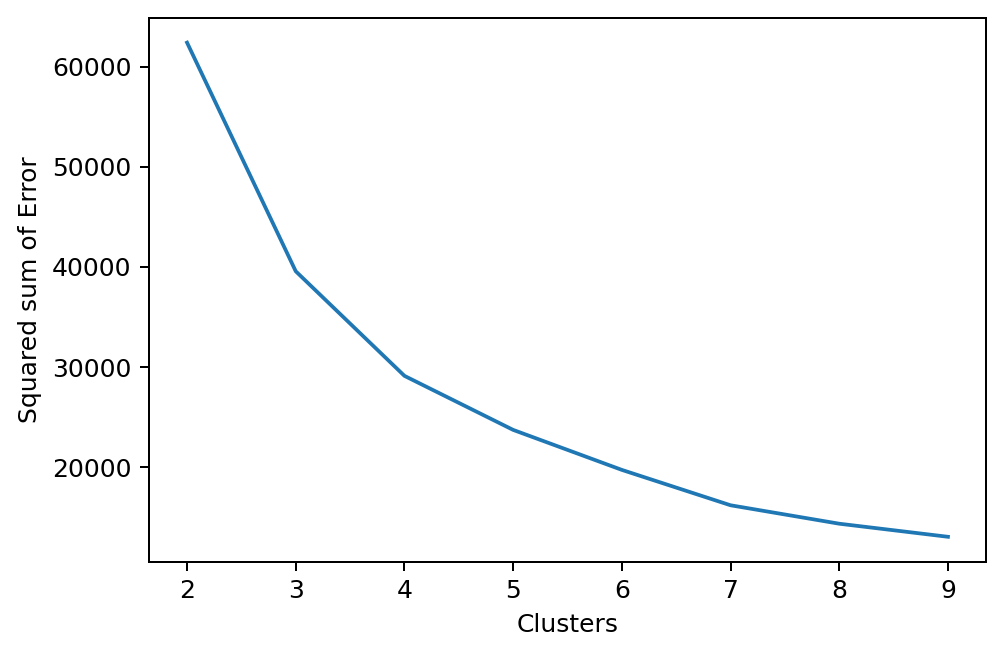

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
e=[]
for i in np.arange(2,10):
    clusters=KMeans(n_clusters=i)
    clusters.fit(ddf)
    e.append(clusters.inertia_)
ax=plt.figure(dpi=180).gca()
plt.plot(np.arange(2,10),e)
plt.xlabel("Clusters")
plt.ylabel("Squared sum of Error")
plt.show()

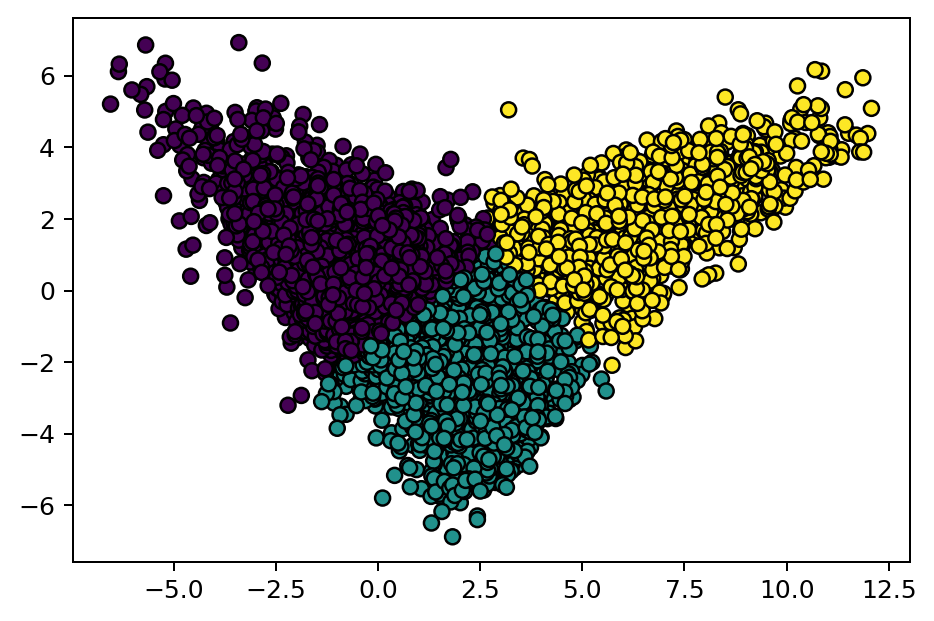

In [67]:
clusters= KMeans(n_clusters=3)
clusters.fit(ddf)
labels=clusters.labels_
ax=plt.figure(dpi=180).gca()
plt.scatter(ddf[:,0],ddf[:,1],c=labels,edgecolors='k',)

## Silouhette Assessment method

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
ss=[]
for i in np.arange(2,10):
    clusters=KMeans(n_clusters=i)
    clusters.fit(ddf)
    ss.append(silhouette_score(ddf,clusters.labels_))

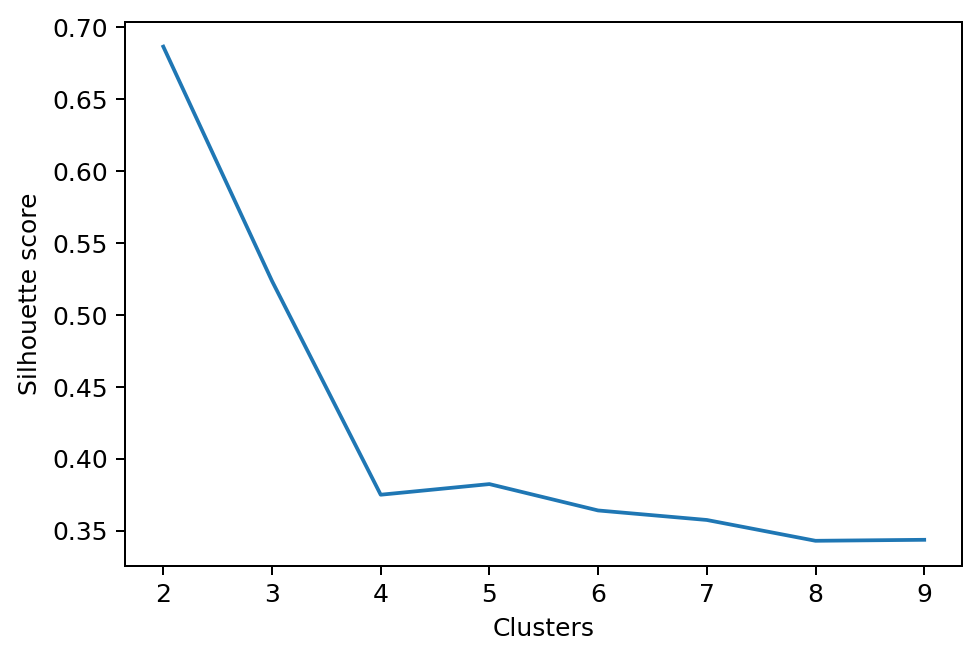

In [69]:
ax=plt.figure(dpi=180).gca()
plt.plot(np.arange(2,10),ss)
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.show()

In [70]:
from sklearn import cluster, datasets, mixture
nsamples=1500
circle=datasets.make_circles(nsamples,noise=0.01)
moon=datasets.make_moons(nsamples,noise=0.01)
blob=datasets.make_blobs(nsamples)
random=np.random.rand(nsamples,2),None

In [71]:
DS=[circle,moon,blob,random]
SDS=[]
from sklearn import preprocessing
for i,j in DS:
    SDS.append(preprocessing.scale(i))

# Silhouette Score for Toy datasets

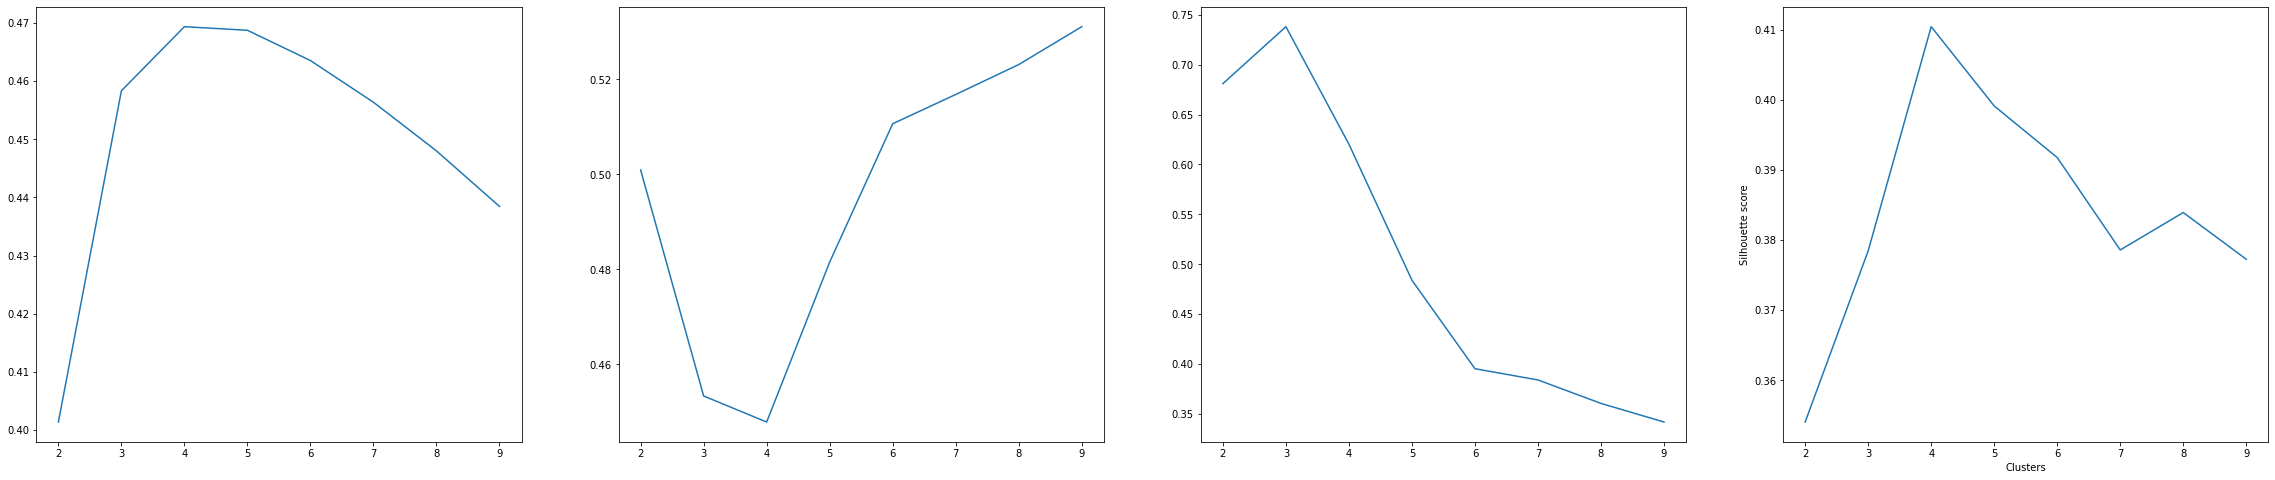

In [72]:
k=0
f,axis=plt.subplots(1,4,figsize=(40,8))
for ds in SDS:
    ss=[]
    for i in np.arange(2,10):
        clusters=KMeans(n_clusters=i)
        clusters.fit(ds)
        ss.append(silhouette_score(ds,clusters.labels_))
    axis[k].plot(np.arange(2,10),ss)
    plt.xlabel("Clusters")
    plt.ylabel("Silhouette score")
    k=k+1

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

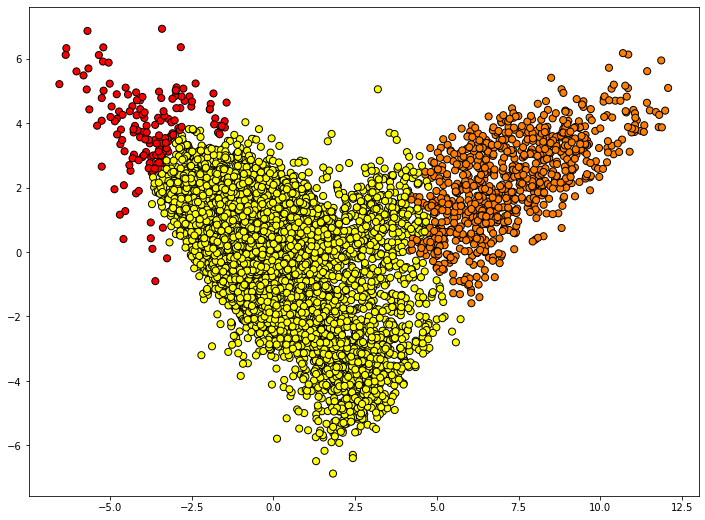

In [74]:
from sklearn.cluster import AgglomerativeClustering
hei_clust = AgglomerativeClustering(n_clusters=3,linkage='average')
hei_clust.fit(ddf)
new_labels = hei_clust.labels_
plt.figure(figsize=(12,9))
plt.scatter(ddf[:,0],ddf[:,1],c = new_labels,cmap='autumn_r', edgecolors='K',s=50)

Agglomerative on HRTU2

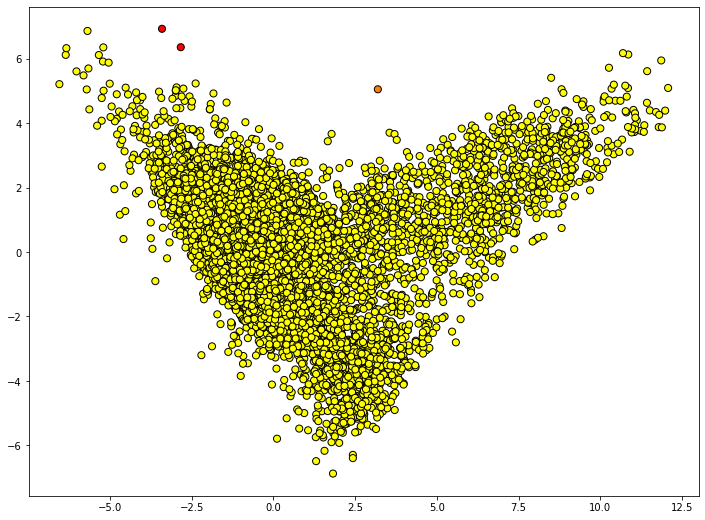

In [75]:
Agg=AgglomerativeClustering(n_clusters=3,linkage='single' )
H=Agg.fit(ddf)
new_labels=H.labels_
plt.figure(figsize=(12,9))
plt.scatter(ddf[:,0],ddf[:,1], c=new_labels,cmap='autumn_r', edgecolors='K',s=50)

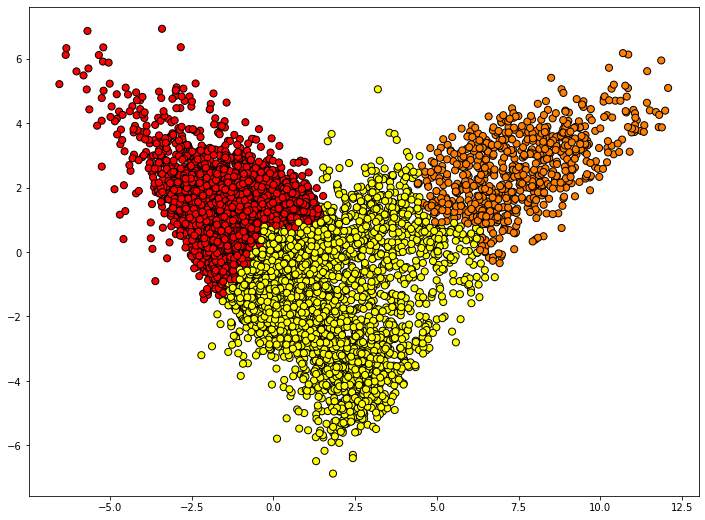

In [76]:
Agg=AgglomerativeClustering(n_clusters=3,linkage='complete' )
H=Agg.fit(ddf)
new_labels=H.labels_
plt.figure(figsize=(12,9))
plt.scatter(ddf[:,0],ddf[:,1], c=new_labels,cmap='autumn_r', edgecolors='K',s=50)

DBSCAN on HRTU2

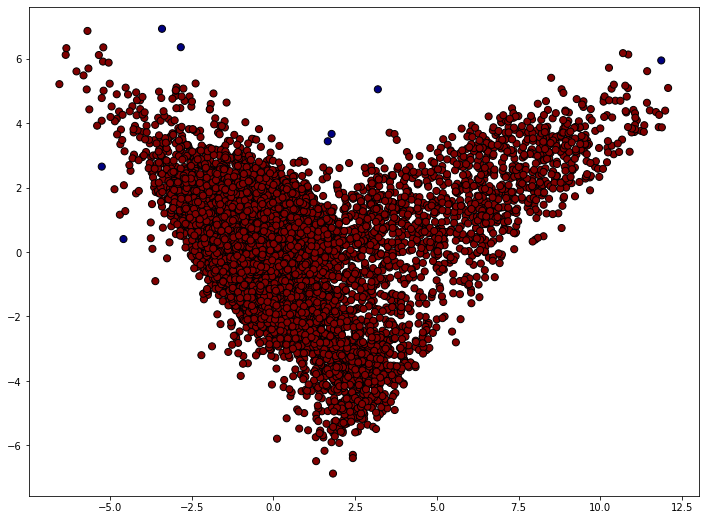

In [77]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.8,metric="euclidean")
dbClust=db.fit(ddf)
new_labels=dbClust.labels_
plt.figure(figsize=(12,9))
plt.scatter(ddf[:,0],ddf[:,1], c=new_labels,cmap='jet', edgecolors='K',s=50)

#KMeans on Toy Datasets

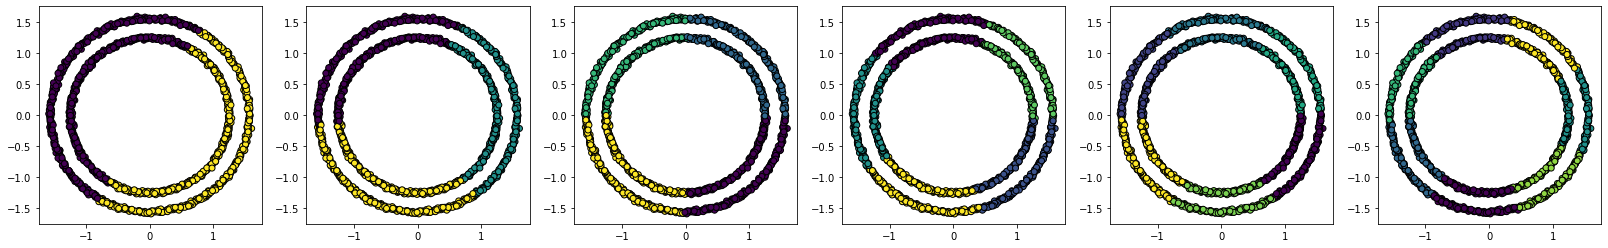

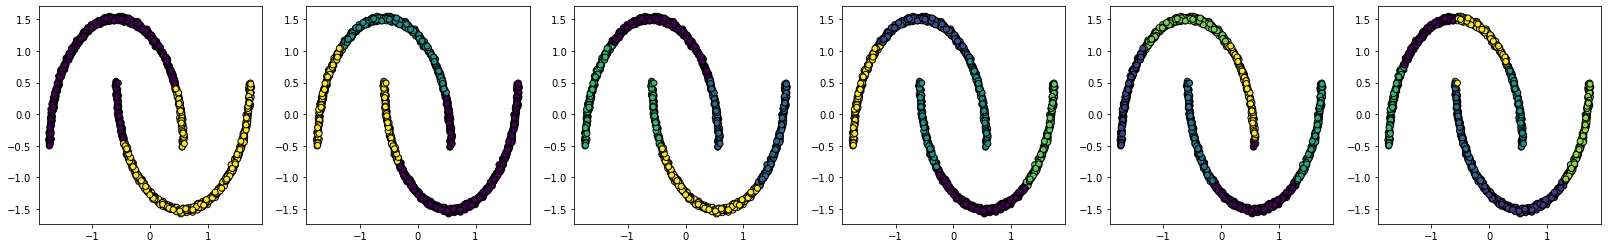

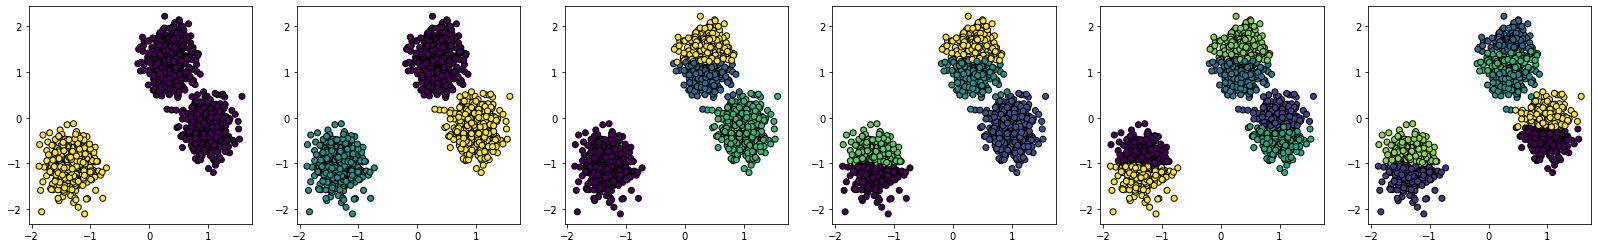

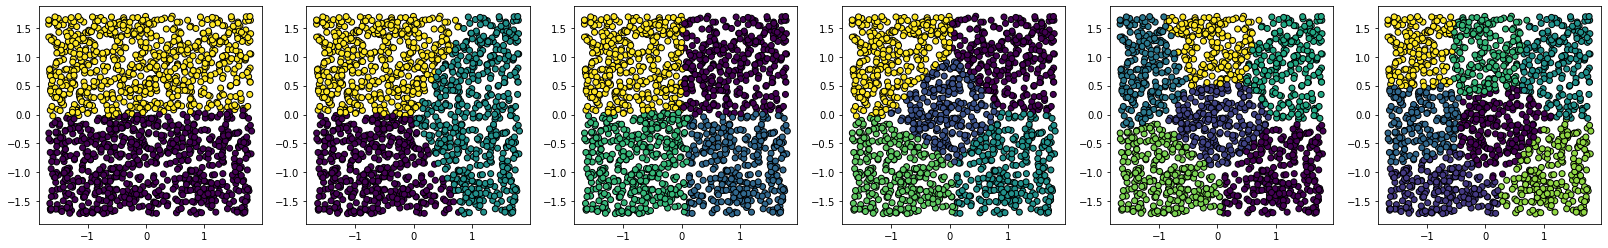

In [78]:
for ds in SDS:
    f,axis=plt.subplots(1, 6,figsize=(28,4))
    for i in np.arange(2,8):
        clusters= KMeans(n_clusters=i)
        clusters.fit(ds)
        labels=clusters.labels_
        axis[i-2].scatter(ds[:,0],ds[:,1],c=labels,edgecolors='k',)
    plt.show()

Agglomerative clustering on Toy Datasets

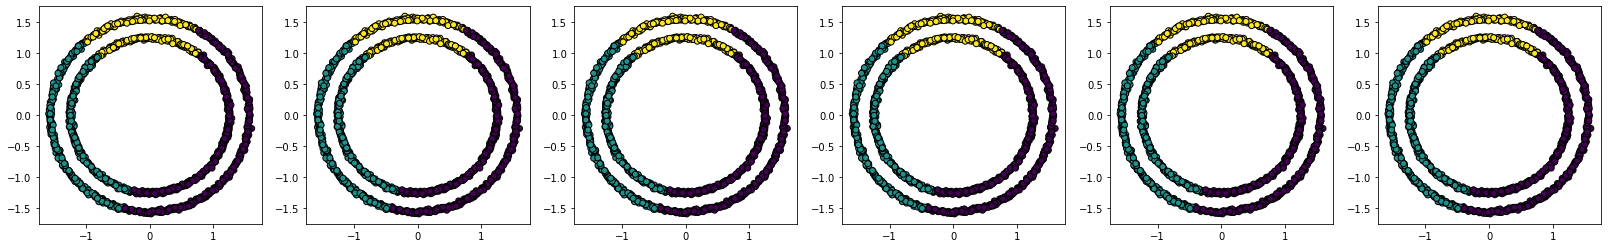

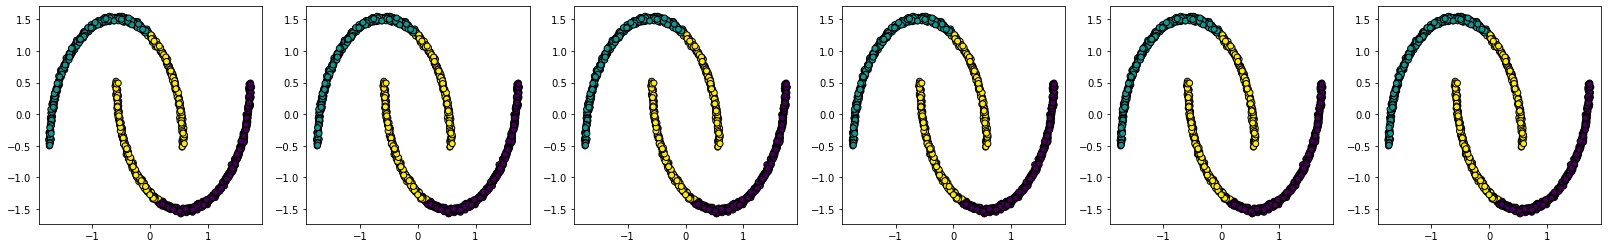

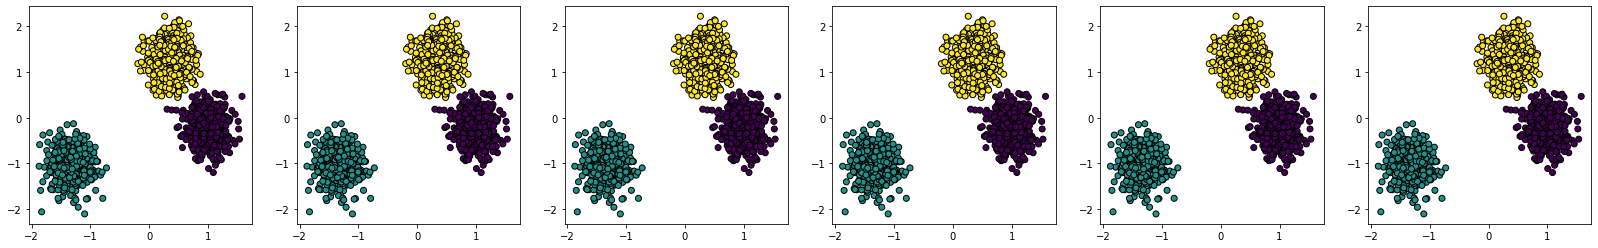

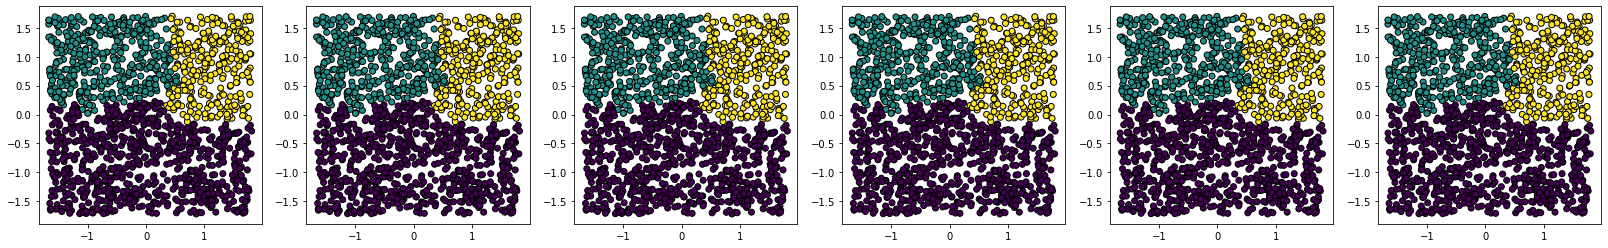

In [79]:
for ds in SDS:
    f,axis=plt.subplots(1, 6,figsize=(28,4))
    for i in np.arange(2,8):
        hei_clust = AgglomerativeClustering(n_clusters=3,linkage='average')
        hei_clust.fit(ds)
        new_labels = hei_clust.labels_
        axis[i-2].scatter(ds[:,0],ds[:,1],c=new_labels,edgecolors='k',)
    plt.show()

DBSCAN on Toy Datasets

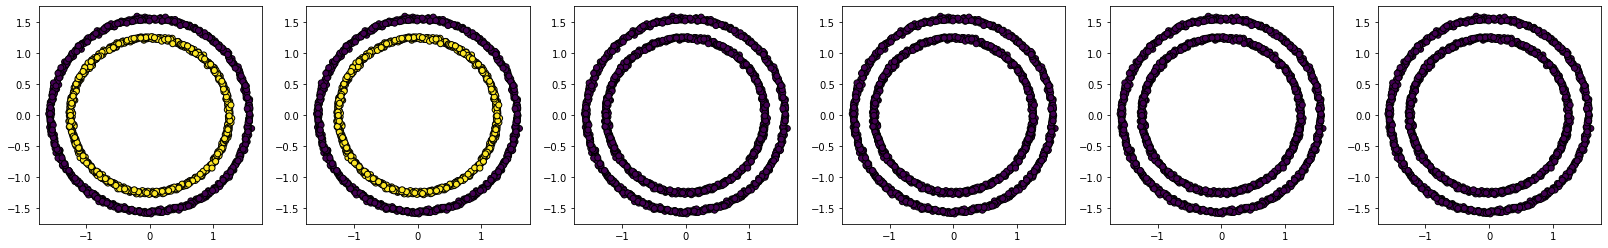

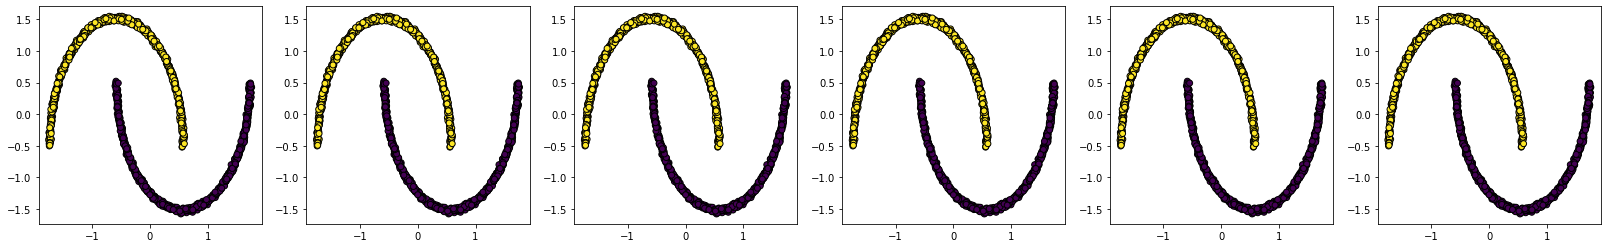

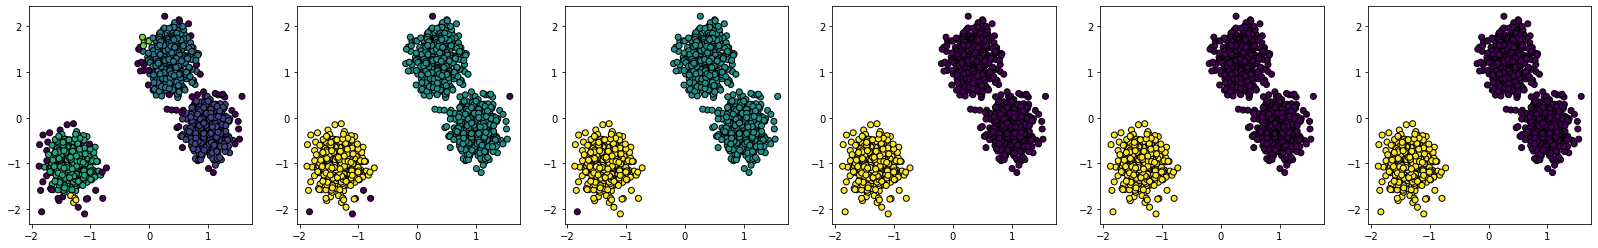

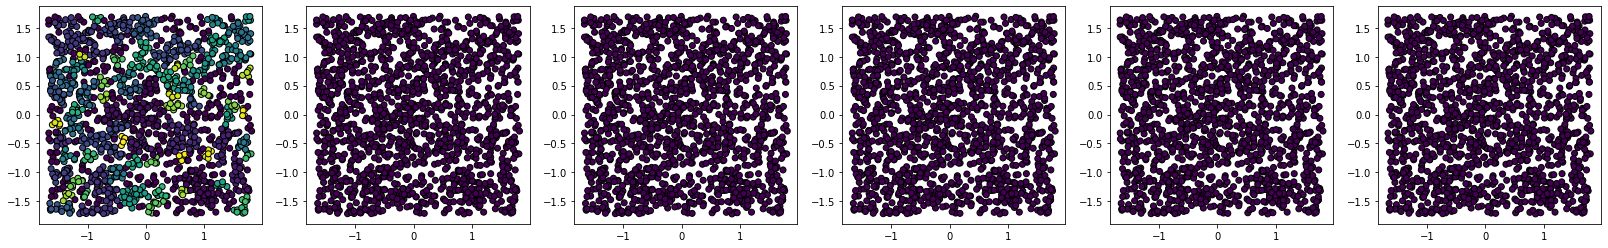

In [80]:
from sklearn.cluster import DBSCAN
for ds in SDS:
    f,axis=plt.subplots(1, 6,figsize=(28,4))
    for i in np.arange(2,8):
        db=DBSCAN(eps=(i-1)/10.0,metric="euclidean")
        clusters=db.fit(ds)
        new_labels=clusters.labels_
        axis[i-2].scatter(ds[:,0],ds[:,1],c=new_labels,edgecolors='k')
    plt.show()

# Dendogram

In [81]:
import numpy as np
from sklearn import cluster, datasets, mixture
from itertools import cycle, islice
np.random.seed(0)

no_of_samples=100

noisy_circles,label1=datasets.make_circles(n_samples=no_of_samples, factor=0.5, noise=.05)

In [82]:
d=preprocessing.scale(noisy_circles)

In [83]:
from scipy.spatial import distance_matrix
dist=distance_matrix(d,d)
dist

array([[0.        , 1.79890961, 3.49251197, ..., 2.0277973 , 3.32399774,
        3.10942345],
       [1.79890961, 0.        , 2.09664675, ..., 1.61429562, 1.62202173,
        1.3105377 ],
       [3.49251197, 2.09664675, 0.        , ..., 1.75454017, 0.93877394,
        1.67991193],
       ...,
       [2.0277973 , 1.61429562, 1.75454017, ..., 0.        , 2.07916566,
        2.36977863],
       [3.32399774, 1.62202173, 0.93877394, ..., 2.07916566, 0.        ,
        0.76744242],
       [3.10942345, 1.3105377 , 1.67991193, ..., 2.36977863, 0.76744242,
        0.        ]])

In [84]:
from scipy.cluster import hierarchy
Z=hierarchy.linkage(dist,'average')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


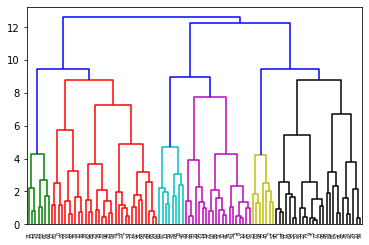

In [85]:
dendro=hierarchy.dendrogram(Z,)

In [89]:
!cp  "/content/drive/MyDrive/Colab Notebooks/Practical 6.ipynb" ./
!jupyter nbconvert --to html "Practical 6"

[NbConvertApp] Converting notebook Practical 6.ipynb to html
[NbConvertApp] Writing 6897077 bytes to Practical 6.html
